In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

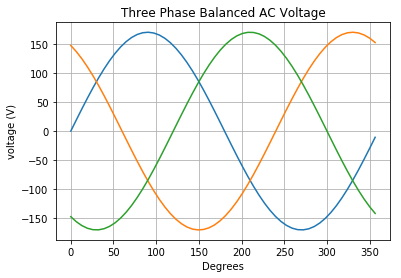

In [2]:
t = np.arange(0, 1/60, 0.0003)
v_a = 170 * np.sin(2 * np.pi * 60 * t)
v_b = 170 * np.sin(2 * np.pi * 60 * t - (4/3) * np.pi)
v_c = 170 * np.sin(2 * np.pi * 60 * t - (2/3) * np.pi)

fig, ax = plt.subplots()
ax.plot(60 * 360 * t, v_a, 60 * 360 * t, v_b, 60 * 360 * t, v_c)
#ax.plot(t, v_a, t, v_b, t, v_c)

ax.set(xlabel='Degrees', ylabel='voltage (V)',
       title='Three Phase Balanced AC Voltage')
ax.grid()

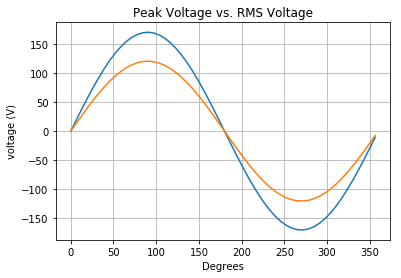

In [3]:
t = np.arange(0, 1/60, 0.0003)
v_a = 170 * np.sin(2 * np.pi * 60 * t)
v_a_rms = 1/np.sqrt(2) * v_a


fig, ax = plt.subplots()
ax.plot(60 * 360 * t, v_a, 60 * 360 * t, v_a_rms)
#ax.plot(t, v_a, t, v_b, t, v_c)

ax.set(xlabel='Degrees', ylabel='voltage (V)',
       title='Peak Voltage vs. RMS Voltage')
ax.grid()

In [4]:
pf = 0.7
pf_direction = "lagging"
apparent_power = 2800000
pf_correction = 3000000
pf_correction_direction = "leading"

In [5]:
if pf_direction == "lagging":
    power_rectangular = complex(apparent_power * pf, apparent_power * np.sin(np.arccos(pf)))
elif pf_direction == "leading":
    power_rectangular = complex(apparent_power * pf, - apparent_power * np.sin(np.arccos(pf)))
else:
    print("Please enter either leading or lagging")
    
print(power_rectangular)

(1959999.9999999998+1999599.959991998j)


In [6]:
if pf_correction_direction == "leading":
    pf_correction_rectangular = complex(0, - pf_correction)
elif pf_correction_direction == "lagging":
    pf_correction_rectangular = complex(0, + pf_correction)
else:
    print("Please enter either leading or lagging")
    
print(pf_correction_rectangular)

-3000000j


In [7]:
corrected_power = power_rectangular + pf_correction_rectangular
print(corrected_power)

(1959999.9999999998-1000400.040008002j)


In [8]:
corrected_power_pf = np.cos(np.angle(corrected_power))
if corrected_power.imag >= 0:
    corrected_power_direction = "lagging"
elif corrected_power.imag < 0:
    corrected_power_direction = "leading"
print(str(corrected_power_pf) + " " + corrected_power_direction)

0.8906882643949358 leading


In [9]:
investment_initial = 10
interest_rate_annual = 1.10
period_years = 50
investment_final = investment_initial * interest_rate_annual ** period_years
print("After " + str(period_years) + " years, your investment is worth " + "$" + str(round(investment_final, 2)))

After 50 years, your investment is worth $1173.91


In [10]:
binary_number = [1,0,1,1]
base_2_digit_count = len(binary_number)
init_base_10_number = 0
for i in range(len(binary_number)):
    if binary_number[i] > 0:
        init_base_10_number += 2**(base_2_digit_count - 1)
    base_2_digit_count -= 1

    
print(init_base_10_number)
        

11


In [12]:
def first_derivative():
    #form of base equation = a*x**2 + b*x + c
    #form of derivative equation = 2*a*x + b + 0
    y = str(input("Enter equation for y in y(x) = ax^2 + bx + c form: "))
    
    a = int(y[0])
    b = int(y[7])
    c = int(y[12])
    
    y_prime = str(2*a) + "x + " + str(b)
    return 'y\'(x) = ' + y_prime
    

print(first_derivative())


Enter equation for y in y(x) = ax^2 + bx + c form: 155x^2 + 15x + 14


ValueError: invalid literal for int() with base 10: '+'

In [34]:
def second_derivative():
    #form of base equation = a*x**2 + b*x + c
    #form of derivative equation = 2*a*x + b
    #form of second derivative equation = 2*a
    y = str(input("Enter equation for y in y(x) = ax^2 + bx + c form: "))
    
    a = int(y[0])
    b = int(y[7])
    c = int(y[12])
    
    y_prime = str(2*a) + "x + " + str(b)
    y_dub_prime = str(2*a)
    return 'y\'\'(x) = ' + y_dub_prime
    

print(second_derivative())

Enter equation for y in y(x) = ax^2 + bx + c form: 5x^2 + 6x + 14
y''(x) = 10


Enter equation in y(x) = Ax^3 + Bx^2 + Cx + D form: -5x^3 + 10x^2 - 2x + 20

A = -5, B = 10, C = -2, D = 20

y'(x) = -15x^2 + 20x + -2
y''(x) = -30x + 20

Test for inflection at a value of x = a where a = 0.667

y''(a - 1) = 30.0
y''(a + 1) = -30.0

Since y''(x) changes sign around x = a, y(x) has a point of inflection at x = 0.667


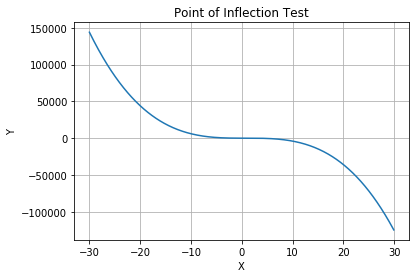

In [61]:
def point_of_inflection_test():
    #test for point of inflection if y''(x) = 0 at x=a and if y''(x) changes sign around x=a
    #establish base equation for y(x) and find second derivative equation
    y = str(input("Enter equation in y(x) = Ax^3 + Bx^2 + Cx + D form: "))
    
    a = ''
    b = ''
    c = ''
    d = ''
    for i in range(len(y)):
        if y[i] == 'x':
            break
        a += str(y[i])
    
    a = int(a)
    if y[1] == '-':
        a = -a

    polynomial_count = 1
    for i in range(len(y)):
        if y[i] == ' ' and y[i + 2] == ' ':
            polynomial_count += 1
            i += 2
        if polynomial_count > 1 and y[i] == 'x':
            break
        elif polynomial_count > 1 and y[i] != ' ':
            b += str(y[i])    
    b = int(b)

    polynomial_count = 1
    for i in range(len(y)):
        if y[i] == ' ' and y[i + 2] == ' ':
            polynomial_count += 1
            i += 2
        if polynomial_count > 2 and y[i] == 'x':
            break
        elif polynomial_count > 2 and y[i] != ' ':
            c += str(y[i])    
    c = int(c)

    polynomial_count = 1
    for i in range(len(y)):
        if y[i] == ' ' and y[i + 2] == ' ':
            polynomial_count += 1
            i += 2
        if polynomial_count > 3 and i == len(y):
            d += str(y[i])
            break
        elif polynomial_count > 3 and y[i] != ' ':
            d += str(y[i])    
    d = int(d)

    #Plot a graph of y(x) as a basic visual aid
    x = np.arange(-30, 30, 0.1)
    y_x = a*x**3 + b*x**2 + c*x + d
    fig, ax = plt.subplots()
    ax.plot(x, y_x)
    ax.set(xlabel='X', ylabel='Y',
           title='Point of Inflection Test')
    ax.grid()
    
    print("\nA = " + str(a) + ", B = " + str(b) + ", C = " + str(c) + ", D = " + str(d))
    
    y_prime = str(3*a) + "x^2 + " + str(2*b) + "x + " + str(c)
    print("\ny\'(x) = " + str(y_prime))
    y_dub_prime = str(2*3*a) + "x + " + str(2*b)
    print("y\'\'(x) = " + str(y_dub_prime))
    
    #Solve for test point (may not exist if base equation is larger and more complex, but this check does not verify that)
    if a < 0:
        test_point = - (0 - (2*b)) / (6 * (-a))
    else:
        test_point = (0 - (2*b)) / (6*a) 
        
    print("\nTest for inflection at a value of x = a where a = " + str(round(test_point, 3)))

    #Check sign of y''(x) on each side of the test point
    y_dub_prime_below_test_point = (6*a)*(test_point - 1) + 2*b
    print("\ny\'\'(a - 1) = " + str(round(y_dub_prime_below_test_point, 3)))
    y_dub_prime_above_test_point = (6*a)*(test_point + 1) + 2*b
    print("y\'\'(a + 1) = " + str(round(y_dub_prime_above_test_point, 3)))
    
    #If sign is the same on both sides, no point of inflection exists. If sign changes, point of inflection at test point
    if np.sign(y_dub_prime_below_test_point) != np.sign(y_dub_prime_above_test_point):
        return '\nSince y\'\'(x) changes sign around x = a, y(x) has a point of inflection at x = ' + str(round(test_point, 3))
    else:
        return '\nNo point of inflection exists for y(x)'
    

print(point_of_inflection_test())

In [18]:
def motor_fla_3_phase():
    hp = float(input("Motor HP: "))
    voltage = float(input("Motor phase voltage: "))
    eff = float(input("Motor efficiency (decimal format): "))
    motor_pf = float(input("Motor power factor (decimal format):"))
    fla = str(round((hp * 746) / (voltage * eff * motor_pf * np.sqrt(3)), 1)) + " Amps"
    return '3 Phase Motor - FLA = ' + fla + ' - Remember that NEC defines motor FLC separately from calculated or nameplate FLA'

motor_fla_3_phase()

Motor HP: 100
Motor phase voltage: 480
Motor efficiency (decimal format): 0.7
Motor power factor (decimal format):0.9


'3 Phase Motor - FLA = 142.4 Amps - Remember that NEC defines motor FLC separately from calculated or nameplate FLA'